In [94]:
from matplotlib import pyplot as plt
from PIL import Image
import pytesseract
import argparse
import cv2
import os


In [95]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

# If you don't have tesseract executable in your PATH, include the following:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract"
# Example tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'

import pandas as pd
img_data = pd.read_csv(r'C:\Users\mypc\Downloads\755275_1304907_bundle_archive\Test.csv')


df = pd.DataFrame(img_data)

content = []

for i in df['Filename']:
    con = pytesseract.image_to_string(Image.open('C:/Users/mypc/Downloads/755275_1304907_bundle_archive/Love is Love/Dataset/'+i))
    content.append(con)

df['Content'] = content

#df = df.drop(columns=['Filename', 'Category',])

df.to_csv(r'my_content.csv', index = False)

In [96]:
df2=pd.read_csv(r'my_content.csv')

In [97]:
df2=df2.fillna(0)


In [98]:
df2.head()

,Filename,Category,Content
0,Test1001.jpg,0.0,"When people ask\nwhat I see in you,\nI just smile and\nlook away because\nI'm afraid if they knew,\nthey'd fall in love\nwith you too."
1,Test1012.jpg,0.0,eS\nSmee) |\naie) al\nRee
2,Test1022.jpg,0.0,LOVE\n®
3,Test1071.jpg,0.0,"ees MU WALLA OL\n\nem eae ie\n\nnot living by society's\nstandards, but deep down,\nthey wish they had the\ncourage to do the same.\n\nwe Being Gay & Proud Quotes\nwww.geckoandfly.com\n\nSe"
4,Test1122.jpg,0.0,"‘Zeigler, author of ""Fair Play: How LGBT Athletes are Claiming their\nRightful Place in Sports.” defied the motion that sports are inberemty\nhomophobic. Part of what is keeping gay athletes close..."


In [99]:
import numpy as np
import pandas as pd
import nltk
import re
import seaborn as sns
import string
import warnings
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore",category=DeprecationWarning)

%matplotlib inline

In [100]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i,'',input_txt)
    return input_txt


In [101]:
df['tidy']=np.vectorize(remove_pattern)(df['Content'],"@[\w]*")
df.head()

,Filename,Category,Content,tidy
0,Test1001.jpg,NaN,"When people ask\nwhat I see in you,\nI just smile and\nlook away because\nI'm afraid if they knew,\nthey'd fall in love\nwith you too.","When people ask\nwhat I see in you,\nI just smile and\nlook away because\nI'm afraid if they knew,\nthey'd fall in love\nwith you too."
1,Test1012.jpg,NaN,eS\nSmee) |\naie) al\nRee,eS\nSmee) |\naie) al\nRee
2,Test1022.jpg,NaN,LOVE\n®,LOVE\n®
3,Test1071.jpg,NaN,"ees MU WALLA OL\n\nem eae ie\n\nnot living by society's\nstandards, but deep down,\nthey wish they had the\ncourage to do the same.\n\nwe Being Gay & Proud Quotes\nwww.geckoandfly.com\n\nSe","ees MU WALLA OL\n\nem eae ie\n\nnot living by society's\nstandards, but deep down,\nthey wish they had the\ncourage to do the same.\n\nwe Being Gay & Proud Quotes\nwww.geckoandfly.com\n\nSe"
4,Test1122.jpg,NaN,"‘Zeigler, author of ""Fair Play: How LGBT Athletes are Claiming their\nRightful Place in Sports.” defied the motion that sports are inberemty\nhomophobic. Part of what is keeping gay athletes close...","‘Zeigler, author of ""Fair Play: How LGBT Athletes are Claiming their\nRightful Place in Sports.” defied the motion that sports are inberemty\nhomophobic. Part of what is keeping gay athletes close..."


In [102]:
df['tidy']=df['tidy'].str.replace("[^a-zA-Z#]"," ")
df.head()

,Filename,Category,Content,tidy
0,Test1001.jpg,NaN,"When people ask\nwhat I see in you,\nI just smile and\nlook away because\nI'm afraid if they knew,\nthey'd fall in love\nwith you too.",When people ask what I see in you I just smile and look away because I m afraid if they knew they d fall in love with you too
1,Test1012.jpg,NaN,eS\nSmee) |\naie) al\nRee,eS Smee aie al Ree
2,Test1022.jpg,NaN,LOVE\n®,LOVE
3,Test1071.jpg,NaN,"ees MU WALLA OL\n\nem eae ie\n\nnot living by society's\nstandards, but deep down,\nthey wish they had the\ncourage to do the same.\n\nwe Being Gay & Proud Quotes\nwww.geckoandfly.com\n\nSe",ees MU WALLA OL em eae ie not living by society s standards but deep down they wish they had the courage to do the same we Being Gay Proud Quotes www geckoandfly com Se
4,Test1122.jpg,NaN,"‘Zeigler, author of ""Fair Play: How LGBT Athletes are Claiming their\nRightful Place in Sports.” defied the motion that sports are inberemty\nhomophobic. Part of what is keeping gay athletes close...",Zeigler author of Fair Play How LGBT Athletes are Claiming their Rightful Place in Sports defied the motion that sports are inberemty homophobic Part of what is keeping gay athletes closete...


In [103]:
df['tidy']=df['tidy'].apply(lambda x :' '.join([w for w in x.split() if len(w)>3]))
df.head()

,Filename,Category,Content,tidy
0,Test1001.jpg,NaN,"When people ask\nwhat I see in you,\nI just smile and\nlook away because\nI'm afraid if they knew,\nthey'd fall in love\nwith you too.",When people what just smile look away because afraid they knew they fall love with
1,Test1012.jpg,NaN,eS\nSmee) |\naie) al\nRee,Smee
2,Test1022.jpg,NaN,LOVE\n®,LOVE
3,Test1071.jpg,NaN,"ees MU WALLA OL\n\nem eae ie\n\nnot living by society's\nstandards, but deep down,\nthey wish they had the\ncourage to do the same.\n\nwe Being Gay & Proud Quotes\nwww.geckoandfly.com\n\nSe",WALLA living society standards deep down they wish they courage same Being Proud Quotes geckoandfly
4,Test1122.jpg,NaN,"‘Zeigler, author of ""Fair Play: How LGBT Athletes are Claiming their\nRightful Place in Sports.” defied the motion that sports are inberemty\nhomophobic. Part of what is keeping gay athletes close...",Zeigler author Fair Play LGBT Athletes Claiming their Rightful Place Sports defied motion that sports inberemty homophobic Part what keeping athletes closeted Zeigher said hyper heteromeninm that ...


In [104]:
tokenized_txt=df['tidy'].apply(lambda x: x.split())
tokenized_txt.head()

0                                                                                                         [When, people, what, just, smile, look, away, because, afraid, they, knew, they, fall, love, with]
1                                                                                                                                                                                                     [Smee]
2                                                                                                                                                                                                     [LOVE]
3                                                                                        [WALLA, living, society, standards, deep, down, they, wish, they, courage, same, Being, Proud, Quotes, geckoandfly]
4    [Zeigler, author, Fair, Play, LGBT, Athletes, Claiming, their, Rightful, Place, Sports, defied, motion, that, sports, inberemty, homophobic, Part, what, keeping, athletes, clo

In [105]:
from nltk.stem.porter import *
stemmer=PorterStemmer()
tokenized_txt=tokenized_txt.apply(lambda x: [stemmer.stem(i) for i in x])

In [106]:
for i in range(len(tokenized_txt)):
    tokenized_txt[i]=' '.join(tokenized_txt[i])
df['tidy']=tokenized_txt

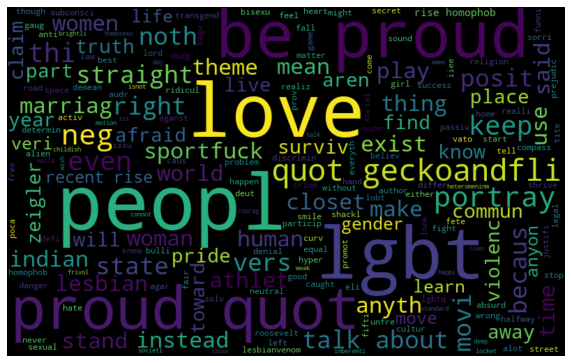

In [107]:
all_words=' '.join([text for text in df['tidy']])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer 
import gensim

In [109]:
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(df['tidy'])
bow.shape

(239, 148)

In [110]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(df['tidy'])
tfidf.shape

(239, 148)

In [111]:
tokenized_txt=df['tidy'].apply(lambda x: x.split())
model_w2v=gensim.models.Word2Vec(tokenized_txt,size=200,window=5,min_count=2,sg=1,hs=0,negative=10,workers=2,seed=34)

In [112]:
model_w2v.train(tokenized_txt,total_examples=len(df['tidy']),epochs=20)

(9097, 24440)

In [113]:
model_w2v.wv.most_similar(positive="love")

[('everyth', 0.9998045563697815),
 ('use', 0.9997841715812683),
 ('your', 0.9997840523719788),
 ('stop', 0.999783992767334),
 ('crime', 0.9997750520706177),
 ('woman', 0.9997744560241699),
 ('that', 0.9997694492340088),
 ('human', 0.999768853187561),
 ('when', 0.9997667074203491),
 ('home', 0.9997662305831909)]

In [114]:
def word_vector(tokens,size):
    vec=np.zeros(size).reshape((1,size))
    count=0
    for word in tokens:
        try:
            vec+=model_w2v[word].reshape((1,size))
            count+=1
        except KeyError:
            continue
    if count!=0:
        vec/=count
    return vec

In [115]:
wordvec_arrays=np.zeros((len(tokenized_txt),200))
for i in range((len(tokenized_txt))):
               wordvec_arrays[i,:]=word_vector(tokenized_txt[i],200)
               wordvec_df=pd.DataFrame(wordvec_arrays)
wordvec_df.shape
               
               

(239, 200)

In [116]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

C:\Users\mypc\Anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [117]:
def add_label(txt):
    output=[]
    for i,s in zip(txt.index,txt):
        output.append(LabeledSentence(s,["tweet_"+str(i)]))
    return output
labeled_tweets=add_label(tokenized_txt)

In [118]:
labeled_tweets[:6]

[LabeledSentence(words=['when', 'peopl', 'what', 'just', 'smile', 'look', 'away', 'becaus', 'afraid', 'they', 'knew', 'they', 'fall', 'love', 'with'], tags=['tweet_0']),
 LabeledSentence(words=['smee'], tags=['tweet_1']),
 LabeledSentence(words=['love'], tags=['tweet_2']),
 LabeledSentence(words=['walla', 'live', 'societi', 'standard', 'deep', 'down', 'they', 'wish', 'they', 'courag', 'same', 'be', 'proud', 'quot', 'geckoandfli'], tags=['tweet_3']),
 LabeledSentence(words=['zeigler', 'author', 'fair', 'play', 'lgbt', 'athlet', 'claim', 'their', 'right', 'place', 'sport', 'defi', 'motion', 'that', 'sport', 'inberemti', 'homophob', 'part', 'what', 'keep', 'athlet', 'closet', 'zeigher', 'said', 'hyper', 'heteromeninm', 'that', 'exist', 'locket', 'roam', 'neg', 'talk', 'about', 'peopl', 'isnot', 'ist', 'instead', 'demean', 'talk', 'about', 'women'], tags=['tweet_4']),
 LabeledSentence(words=[], tags=['tweet_5'])]

In [127]:
model_d2v=gensim.models.Doc2Vec(dm=1,dm_mean=1,size=200,window=5,negative=7,min_count=5,workers=3,alpha=0.1,seed=23)
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets,total_examples=len(df['tidy']),epochs=15)

C:\Users\mypc\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|█████████████████████████████████████████████████████████████████████████████| 239/239 [00:00<00:00, 59864.95it/s]


In [130]:
docvec_arrays=np.zeros((len(tokenized_txt),200))
for i in range(len(df)):
                       docvec_arrays[i,:]=model_d2v.docvecs[i].reshape((1,200))
docvec_df=pd.DataFrame(docvec_arrays)
docvec_df.shape
    
    

(239, 200)

In [131]:
df=df.drop(df.columns[[0, 2]], axis=1) 

In [132]:
df.head()

,Category,tidy
0,NaN,when peopl what just smile look away becaus afraid they knew they fall love with
1,NaN,smee
2,NaN,love
3,NaN,walla live societi standard deep down they wish they courag same be proud quot geckoandfli
4,NaN,zeigler author fair play lgbt athlet claim their right place sport defi motion that sport inberemti homophob part what keep athlet closet zeigher said hyper heteromeninm that exist locket roam neg...


In [141]:
from textblob import TextBlob
df['Category'] = df['tidy'].apply(lambda tweet: max(TextBlob(tweet).sentiment))

In [142]:
df.head()

,Category,tidy
0,0.533333,when peopl what just smile look away becaus afraid they knew they fall love with
1,0.000000,smee
2,0.600000,love
3,0.385648,walla live societi standard deep down they wish they courag same be proud quot geckoandfli
4,0.717857,zeigler author fair play lgbt athlet claim their right place sport defi motion that sport inberemti homophob part what keep athlet closet zeigher said hyper heteromeninm that exist locket roam neg...


In [146]:
df['Category'] = df['Category'].apply(lambda x: 1 if x>=0.5 else 0)


In [147]:
df.head()

,Category,tidy
0,1,when peopl what just smile look away becaus afraid they knew they fall love with
1,0,smee
2,1,love
3,0,walla live societi standard deep down they wish they courag same be proud quot geckoandfli
4,1,zeigler author fair play lgbt athlet claim their right place sport defi motion that sport inberemti homophob part what keep athlet closet zeigher said hyper heteromeninm that exist locket roam neg...


In [151]:
df.dtypes

Category     int64
tidy        object
dtype: object

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [153]:
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]
xtrain_bow,xvalid_bow,ytrain,yvalid=train_test_split(train_bow,df['Category'],random_state=42,test_size=0.3)

In [154]:
lreg=LogisticRegression()
lreg.fit(xtrain_bow,ytrain)
prediction=lreg.predict_proba(xvalid_bow)
predict_int=prediction[:,1]>=0.3
predict_int=predict_int.astype(np.int)
f1_score(yvalid,predict_int)

0.5555555555555556

In [155]:
from sklearn import svm

In [158]:
svc=svm.SVC(kernel='linear',C=1,probability=True).fit(xtrain_bow,ytrain)
prediction=svc.predict_proba(xvalid_bow)
predict_int=prediction[:,1]>=0.3
predict_int=predict_int.astype(np.int)
f1_score(yvalid,predict_int)

0.5555555555555556